In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

In [11]:
os.listdir()


['0uW.asc',
 '100uW.asc',
 '12uW.asc',
 '1uW.asc',
 '20uW.asc',
 '30uW.asc',
 '3uW.asc',
 '40uW.asc',
 '50uW.asc',
 '5uW.asc',
 '60uW.asc',
 '70uW.asc',
 '80uW.asc',
 '90uW.asc',
 'spectra_plot.png']

In [10]:
os.chdir(os.listdir()[0])

In [47]:
plt.close('all')
# Read in the data as a pandas dataframe
#df = pd.read_csv('apd_data/Bidirectional_histogram_2023-03-13_163157.txt', delim_whitespace=True)
df2 = pd.read_csv(os.listdir()[1], delim_whitespace=True, header = None, names=['Wavelength (nm)', 'Counts'])



In [48]:
def lorentzian(x, a, x0, fwhm):
    gamma = fwhm / 2.0
    return a * gamma**2 / ((x - x0)**2 + gamma**2)

In [55]:
x_min = 480
x_max = 545

In [56]:
df2[y2]

0      -3
1       1
2      -1
3       5
4       7
       ..
1595   -3
1596   -1
1597   -1
1598   -3
1599   -3
Name: Counts, Length: 1600, dtype: int64

In [57]:

x2 = df2.columns[0]
y2 = df2.columns[1]
mask = (df2[x2] > x_min) & (df2[x2] < x_max)

In [58]:

p0 = [1000, 510, 20]  # Initial guess for the parameters
params, _ = curve_fit(lorentzian, df2[x2][mask], df2[y2][mask], p0=p0)


In [59]:
print(params)

[2622.25378828  513.20905118    3.75882159]


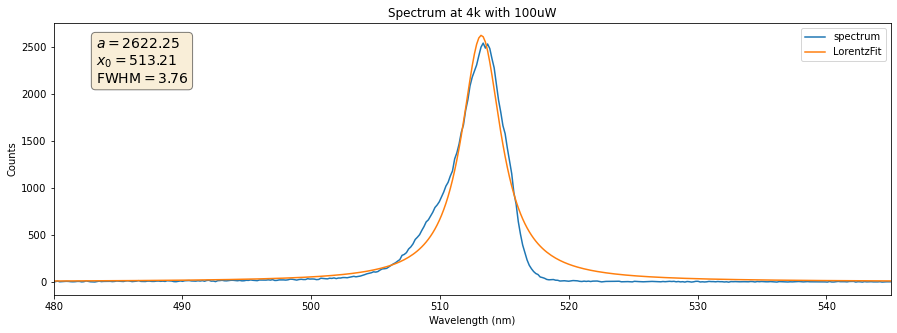

In [60]:
fig, axs = plt.subplots(1, 1, figsize=(15,5))
#axs[0].plot(df[x1], df[y1])
#axs[0].set_xlabel(x1)
#axs[0].set_ylabel(y1)
#axs[0].set_title('Time difference of two APD triggers at 4.3uW power')
#axs[0].set_ylim(150000, 160000)
                 

axs.plot(df2[x2], df2[y2], label = 'spectrum')
axs.set_xlabel(x2)
axs.set_ylabel(y2)
axs.plot(df2[x2], lorentzian(df2[x2], *params), label='LorentzFit')
axs.set_title('Spectrum at 4k with 100uW')
axs.legend()
axs.set_xlim(x_min,x_max)

textstr = '\n'.join((
    r'$a=%.2f$' % (params[0],),
    r'$x_0=%.2f$' % (params[1],),
    r'FWHM$=%.2f$' % (params[2],)))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Show the plot
plt.show()
